In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving filtered_df.csv to filtered_df.csv


In [3]:
df = pd.read_csv('filtered_df.csv')
df.head()

,drugName,condition,review,rating,date,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166


In [4]:
df.describe()

,rating,usefulCount
count,13944.000000,13944.000000
mean,6.862952,45.737880
std,3.207061,51.782627
min,1.000000,0.000000
25%,4.000000,16.000000
50%,8.000000,31.000000
75%,10.000000,59.000000
max,10.000000,1291.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     13944 non-null  object 
 1   condition    13944 non-null  object 
 2   review       13944 non-null  object 
 3   rating       13944 non-null  float64
 4   date         13944 non-null  object 
 5   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 653.8+ KB


# EDA and DATA VISUALIZATION

In [6]:
# Missing values
df.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
len(df['drugName'].unique()) 

334

In [9]:
# Most popular drugs
# Top 20
df['drugName'].value_counts().nlargest(20)

Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Lexapro           306
Cymbalta          303
Fluoxetine        302
Viibryd           285
Zoloft            281
Liraglutide       270
Lisinopril        264
Victoza           255
Trintellix        243
Dulaglutide       231
Name: drugName, dtype: int64

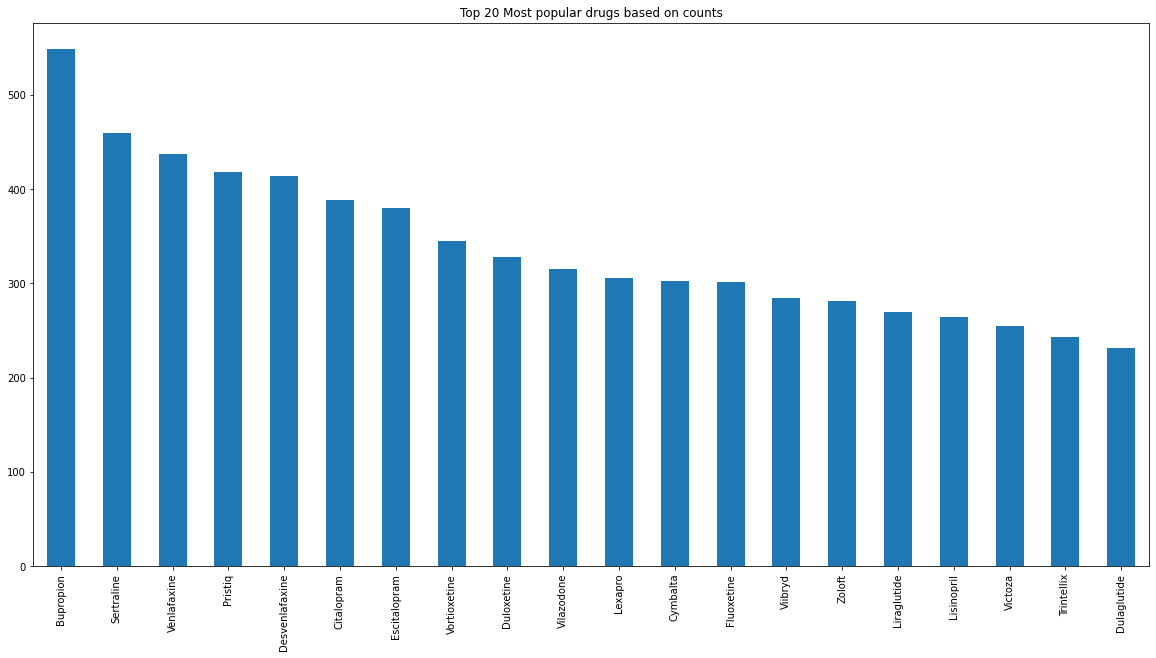

In [10]:
# Top 20 Drugs(MOst Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Most popular drugs based on counts')
plt.show()

<Figure size 1080x720 with 0 Axes>

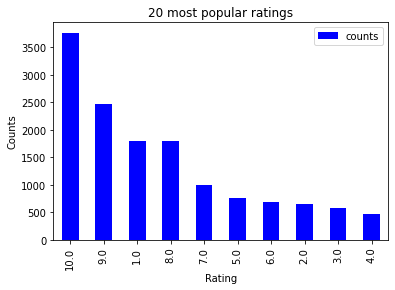

In [11]:
# Grouping the data by rating and count the frequency of each rating
rating_counts = df.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
rating_counts[:20].plot.bar(x='rating',y='counts',color='blue')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

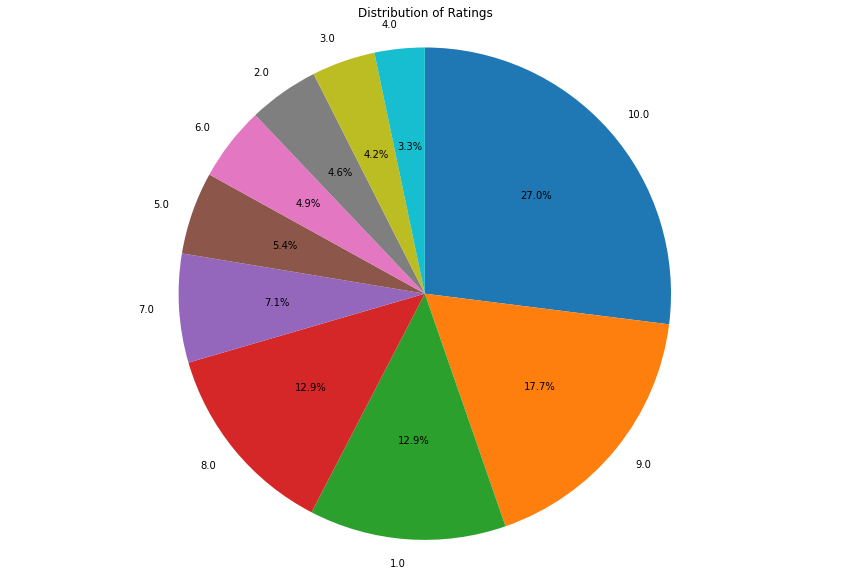

In [12]:
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

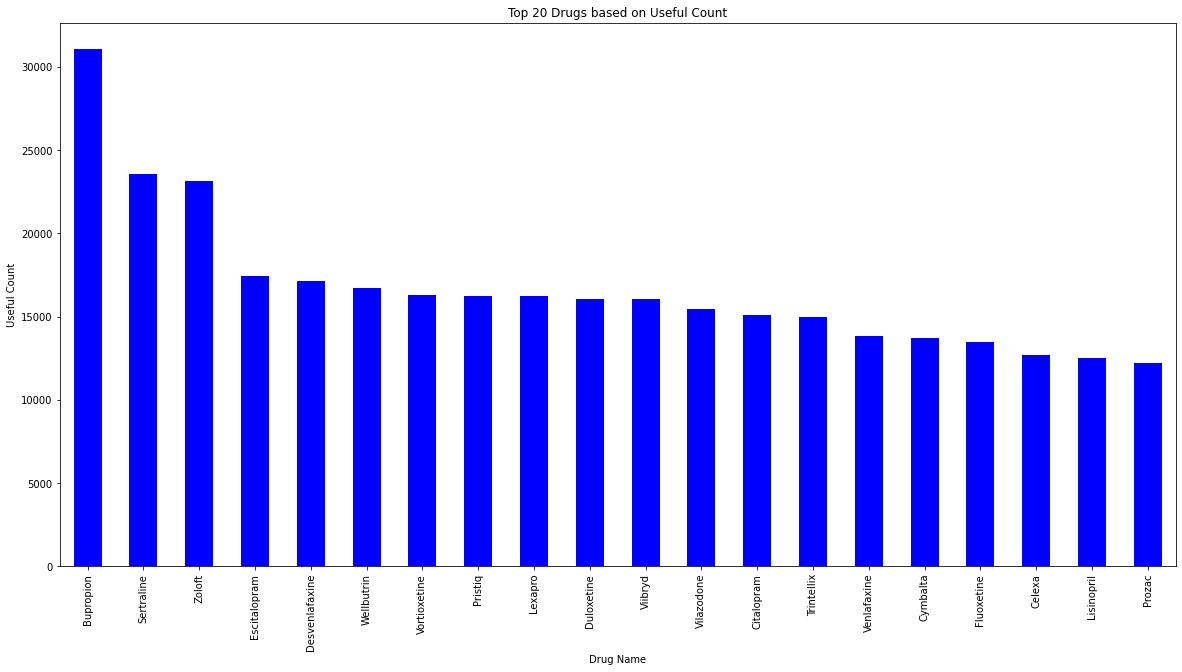

In [13]:
# Get the 20 most popular drugs based on usefulCount
plt.figure(figsize=(20,10))
top_20_drugs = df.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False).head(20)

# Plot the bar plot
top_20_drugs.plot(kind='bar', color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Useful Count')
plt.title('Top 20 Drugs based on Useful Count')
plt.xticks(rotation=90)
plt.show()

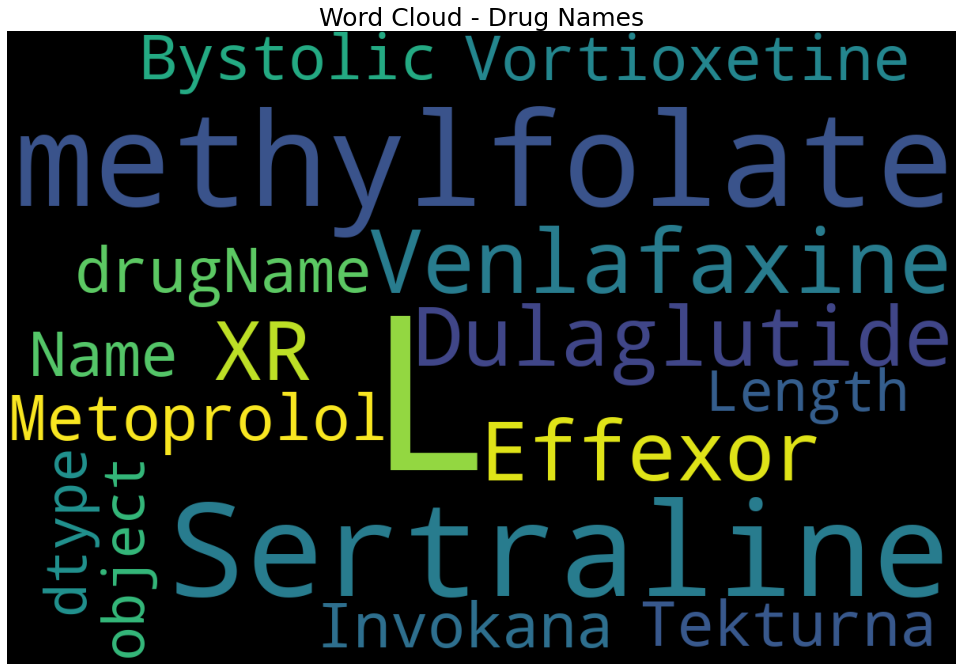

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

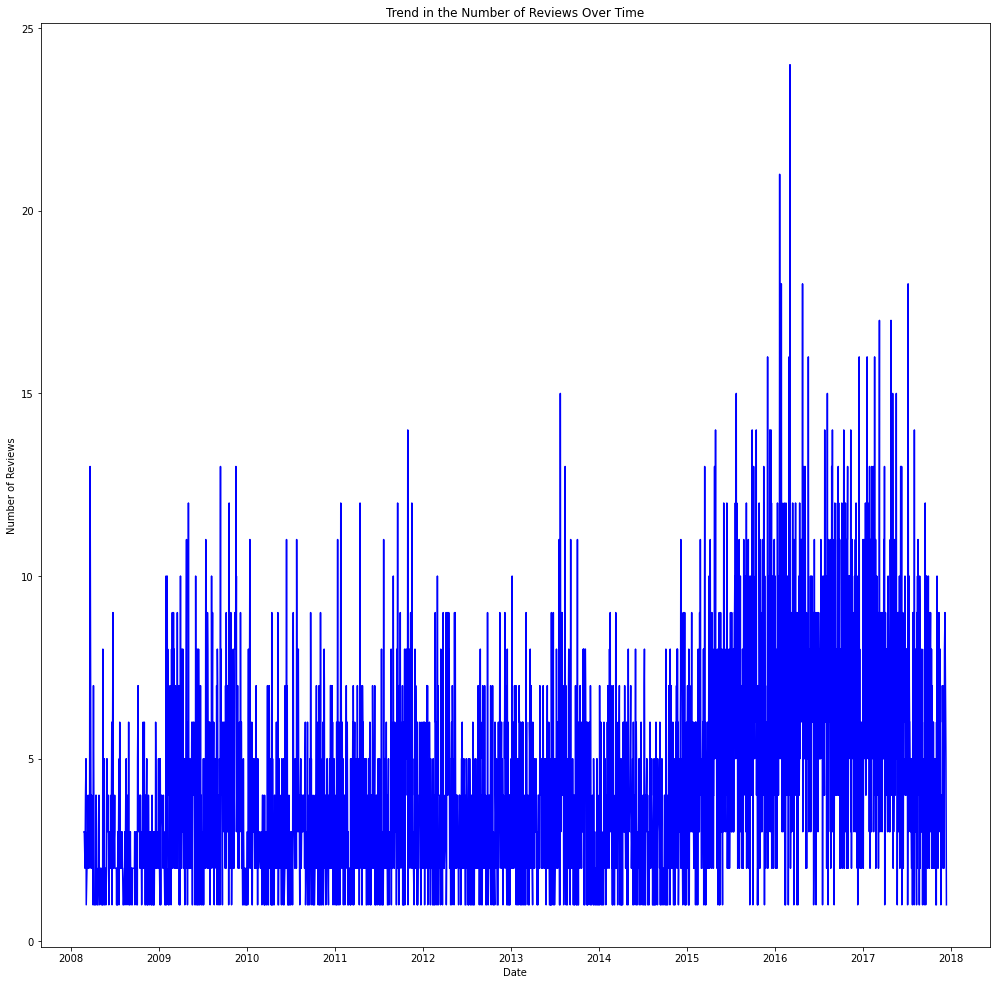

In [15]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='counts')

# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

Interpretation:

1-Improved Accessibility: There might have been improvements in the accessibility of the drug, either through increased availability or decreased cost, which led to an increase in the number of patients using the drug and writing reviews.

2-Increased Use of Online Platforms: The increase in the use of online platforms for reviewing drugs and conditions might have contributed to the increase in the number of reviews from 2015 onwards.

3-Changes in Marketing Strategies: The drug manufacturer or the healthcare industry might have changed their marketing strategies to increase the visibility of the drug, which led to an increase in the number of patients using the drug and writing reviews.

# Feature Engineering/Data preprocessing

In [16]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def clean_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the review
    tokens = nltk.word_tokenize(review)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Join the cleaned tokens back together
    cleaned_review = ' '.join(tokens)
    
    return cleaned_review

In [18]:
df['review'] = df['review'].apply(lambda x: clean_review(x))

The importance of the date feature depends on the business problem and the type of model being used. In some cases, the date feature may be important in identifying patterns and trends over time. For example, if you are building a time-series model, the date feature would be an important input for the model. However, in other cases, the date feature may not be as relevant. For instance, if you are building a model to predict the rating based on the review, the date feature may not have a significant impact on the model's predictions.

In [19]:
df.drop(['date'],axis=1,inplace=True)

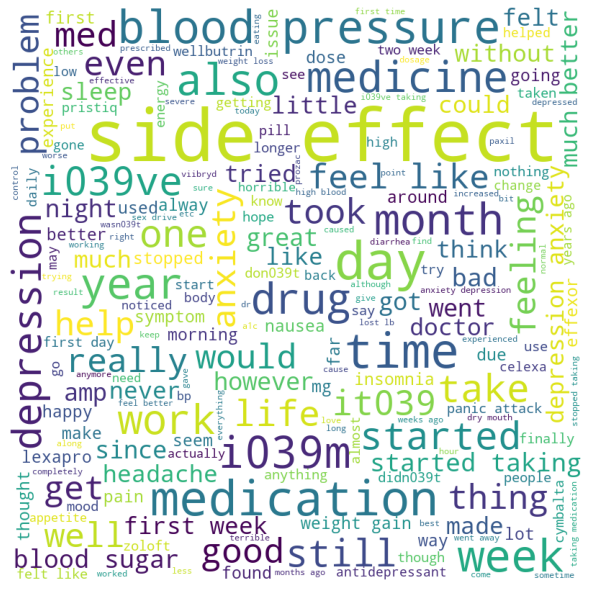

In [20]:
# Get the stopwords as a list
stopwords = list(stopwords.words('english'))

# Join all the reviews into a single string
reviews_text = " ".join(review for review in df.review)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [21]:
df

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,taken antidepressants years improvement mostly...,10.0,54
1,Sertraline,Depression,1 week zoloft anxiety mood swings take 50mg mo...,8.0,3
2,Venlafaxine,Depression,gp started venlafaxine yesterday help depressi...,4.0,3
3,Dulaglutide,"Diabetes, Type 2",hey guys it039s 4 months since last post wante...,10.0,24
4,Effexor XR,Depression,medicine saved life wits end antidepressants r...,10.0,166
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,fourth blood pressure pill feels like partly w...,4.0,39
13940,Bystolic,High Blood Pressure,bystolic feet arms numb blood sugars became se...,1.0,25
13941,Invokana,"Diabetes, Type 2",got diagnosed type 2 doctor prescribed invokan...,9.0,47
13942,Vortioxetine,Depression,third med i039ve tried anxiety mild depression...,2.0,33


## MODEL BUILDING

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error

In [22]:
df["rating"] = df["rating"].astype(int)

In [24]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(df["review"])

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, df["condition"], test_size=0.25, random_state=42)

## LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Train the model
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [29]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.93      0.99      0.96      2257
   Diabetes, Type 2       0.98      0.91      0.94       627
High Blood Pressure       0.96      0.79      0.87       602

           accuracy                           0.94      3486
          macro avg       0.96      0.90      0.92      3486
       weighted avg       0.94      0.94      0.94      3486



In [30]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [31]:
# Recommend the top 5 drugs with the highest average rating and usefulCount for the condition
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      2257
   Diabetes, Type 2       0.98      0.93      0.95       627
High Blood Pressure       0.97      0.83      0.90       602

           accuracy                           0.95      3486
          macro avg       0.96      0.92      0.94      3486
       weighted avg       0.96      0.95      0.95      3486



In [35]:
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model2.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [36]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## SUPPORT VECTOR MACHINE

In [37]:
from sklearn.svm import SVC

In [38]:
# Train the model
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [39]:
# Evaluate the model
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2257
   Diabetes, Type 2       0.98      0.93      0.96       627
High Blood Pressure       0.97      0.85      0.90       602

           accuracy                           0.96      3486
          macro avg       0.97      0.92      0.94      3486
       weighted avg       0.96      0.96      0.96      3486



In [40]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model3.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [41]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## GRADIENT BOOSTING

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
# Train the model
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
# Evaluate the model
y_pred = model4.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.90      0.99      0.95      2257
   Diabetes, Type 2       0.99      0.85      0.91       627
High Blood Pressure       0.97      0.75      0.84       602

           accuracy                           0.92      3486
          macro avg       0.95      0.86      0.90      3486
       weighted avg       0.93      0.92      0.92      3486



In [45]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model4.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [46]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


## DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Train the model
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Evaluate the model
y_pred = model5.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.95      0.97      0.96      2257
   Diabetes, Type 2       0.92      0.93      0.93       627
High Blood Pressure       0.90      0.84      0.87       602

           accuracy                           0.94      3486
          macro avg       0.93      0.91      0.92      3486
       weighted avg       0.94      0.94      0.94      3486



In [50]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model5.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


In [51]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")[["rating", "usefulCount"]].mean()
drug_ratings["combined_score"] = drug_ratings["rating"] + drug_ratings["usefulCount"]
recommended_drugs = drug_ratings.nlargest(5, "combined_score").index.tolist()
print("Recommended Drugs:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs:
1 Methylin ER
2 Desyrel
3 Provigil
4 Elavil
5 Norpramin


Support Vector Machine Giving Highest Accuracy